In [3]:
from model import *
from sklearn import mixture, cluster
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_digits, load_wine
import warnings
warnings.filterwarnings("ignore")
import random

## UCI datasets exp

In [4]:
# load Iris dataset 
iris = load_iris()

X = iris.data
y_true = iris.target
K = np.unique(y_true).shape[0]
X.shape

# Clustering accuracy sklearn dpgmm
dpgmm = mixture.BayesianGaussianMixture(n_components=10,
                                        covariance_type='full').fit(X)
y_pred = dpgmm.predict(X)
acc_dpgmm = cluster_acc(y_pred, y_true.astype(np.int32))[0]
print("Clustering accuracy with Bayesian GMM : ",  acc_dpgmm)

Clustering accuracy with Bayesian GMM :  0.7866666666666666


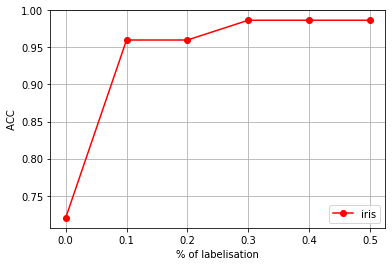

In [8]:
# semi supervised clustering of Iris 10 iteration of the algorithm (takes some time)
percentages = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
from sklearn.utils import shuffle
X,y_true = shuffle(X, y_true)
acc = np.zeros((10,6))

for i in range(10):
    for j in range(len(percentages)):
        per = percentages[j]
        partial_labels = np.array([None] * len(y_true))
        partial_labels[0:int(per * len(y_true))] = y_true[0:int(per * len(y_true))]


        hmrf_gmm = HMRF_GMM(X, 10, partial_labels, lambda_=0.001, mode='complete', init="kmeans")
        L = hmrf_gmm.Inference(max_iter=500, debug=False)
        y_pred = hmrf_gmm.infer_clusters()
        acc[i, j] = cluster_acc(y_pred, y_true)[0]

acc_iris = acc
plt.errorbar(percentages, np.max(acc_iris,0), fmt='-o', color='red', label='iris')
plt.legend(loc='lower right')
plt.xlabel("% of labelisation")
plt.ylabel(" ACC ")
plt.grid()